In [63]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [65]:
df = pd.read_csv("combinedMayFiles.csv", parse_dates=[[7,8]], keep_date_col=True)


In [199]:
df.head()
df.shape
len(df.UNIT.unique())

468

In [67]:
regular = df['DESC'] == 'REGULAR' ## Working only on Regular DESC
df = df[regular]
df.head()

,DATE_TIME,Unnamed: 0,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2019-04-27 00:00:00,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833
1,2019-04-27 04:00:00,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,04:00:00,REGULAR,7035269,2384840
2,2019-04-27 08:00:00,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,08:00:00,REGULAR,7035292,2384875
3,2019-04-27 12:00:00,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,12:00:00,REGULAR,7035392,2384951
4,2019-04-27 16:00:00,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,16:00:00,REGULAR,7035651,2385020


In [68]:
df = df.drop(['LINENAME', 'DIVISION','DESC','C/A','Unnamed: 0'], axis=1)

In [69]:
df.head()

,DATE_TIME,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS
0,2019-04-27 00:00:00,R051,02-00-00,59 ST,04/27/2019,00:00:00,7035249,2384833
1,2019-04-27 04:00:00,R051,02-00-00,59 ST,04/27/2019,04:00:00,7035269,2384840
2,2019-04-27 08:00:00,R051,02-00-00,59 ST,04/27/2019,08:00:00,7035292,2384875
3,2019-04-27 12:00:00,R051,02-00-00,59 ST,04/27/2019,12:00:00,7035392,2384951
4,2019-04-27 16:00:00,R051,02-00-00,59 ST,04/27/2019,16:00:00,7035651,2385020


# Looking at the data

In [70]:
df['STATION'].value_counts()

34 ST-PENN STA     17231
FULTON ST          16839
GRD CNTRL-42 ST    12031
23 ST              11826
86 ST              10436
                   ...  
BAYCHESTER AV        477
190 ST               459
CLEVELAND ST         336
SUTTER AV            335
ORCHARD BEACH         70
Name: STATION, Length: 378, dtype: int64

In [71]:
df.describe()

,ENTRIES,EXITS
count,8.193980e+05,8.193980e+05
mean,4.133787e+07,3.389842e+07
std,2.107976e+08,1.945038e+08
min,0.000000e+00,0.000000e+00
25%,3.556842e+05,1.453970e+05
50%,2.177859e+06,1.249600e+06
75%,6.796476e+06,4.607690e+06
max,2.129343e+09,2.124127e+09


In [72]:
df.dtypes

DATE_TIME                                                               datetime64[ns]
UNIT                                                                            object
SCP                                                                             object
STATION                                                                         object
DATE                                                                            object
TIME                                                                            object
ENTRIES                                                                          int64
EXITS                                                                            int64
dtype: object

In [73]:
#firstStationd = df.groupby(df['STATION'] == '59 ST' )

In [74]:
#firstStationd.head()

In [75]:
df.shape

(819398, 8)

# All Stations, All Units, All CSP

In [76]:
df_concat_1 = df

## Preprocessing: 1. Getting Hours from Time

In [77]:
## Getting Hour from Time
def hour_(time):
    dt = pd.to_datetime(time, dayfirst=True)
    hour = dt.hour
    return hour
df_concat_1['Hour'] = df_concat_1['TIME'].map(hour_)

In [78]:
df_concat_1['Hour'].value_counts()

8     78772
16    72818
12    72425
0     72179
4     72092
20    72057
9     54788
17    53351
13    52815
5     52780
21    52772
1     52683
10     6989
18     6579
6      6031
14     5852
2      5713
22     5666
7      5279
11     4403
19     3549
15     3385
23     3300
3      3120
Name: Hour, dtype: int64

In [79]:
df_concat_1.head()

,DATE_TIME,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,Hour
0,2019-04-27 00:00:00,R051,02-00-00,59 ST,04/27/2019,00:00:00,7035249,2384833,0
1,2019-04-27 04:00:00,R051,02-00-00,59 ST,04/27/2019,04:00:00,7035269,2384840,4
2,2019-04-27 08:00:00,R051,02-00-00,59 ST,04/27/2019,08:00:00,7035292,2384875,8
3,2019-04-27 12:00:00,R051,02-00-00,59 ST,04/27/2019,12:00:00,7035392,2384951,12
4,2019-04-27 16:00:00,R051,02-00-00,59 ST,04/27/2019,16:00:00,7035651,2385020,16


In [80]:
df_concat_1.columns

Index(['DATE_TIME', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME', 'ENTRIES',
       'EXITS                                                               ',
       'Hour'],
      dtype='object')

In [81]:
df_concat_1['DUS']=df_concat_1['STATION'].map(str)+' '+df_concat_1['UNIT'].map(str)+ +df_concat_1['SCP'].map(str)

In [82]:
df_concat_1.head()

,DATE_TIME,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,Hour,DUS
0,2019-04-27 00:00:00,R051,02-00-00,59 ST,04/27/2019,00:00:00,7035249,2384833,0,59 ST R05102-00-00
1,2019-04-27 04:00:00,R051,02-00-00,59 ST,04/27/2019,04:00:00,7035269,2384840,4,59 ST R05102-00-00
2,2019-04-27 08:00:00,R051,02-00-00,59 ST,04/27/2019,08:00:00,7035292,2384875,8,59 ST R05102-00-00
3,2019-04-27 12:00:00,R051,02-00-00,59 ST,04/27/2019,12:00:00,7035392,2384951,12,59 ST R05102-00-00
4,2019-04-27 16:00:00,R051,02-00-00,59 ST,04/27/2019,16:00:00,7035651,2385020,16,59 ST R05102-00-00


## Preprocessing: 2. Handling Enreies and Exits Comulation process

In [83]:
def entries_by_hours(df):
    hourlyEntries = df.ENTRIES - df.ENTRIES.shift(1) 
    df['hourly_ENTRIES'] = hourlyEntries.fillna(1)
    return df
df_concat_1 = df_concat_1.groupby('DUS').apply(entries_by_hours)

In [84]:
df_concat_1.head(3)

,DATE_TIME,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,Hour,DUS,hourly_ENTRIES
0,2019-04-27 00:00:00,R051,02-00-00,59 ST,04/27/2019,00:00:00,7035249,2384833,0,59 ST R05102-00-00,1.0
1,2019-04-27 04:00:00,R051,02-00-00,59 ST,04/27/2019,04:00:00,7035269,2384840,4,59 ST R05102-00-00,20.0
2,2019-04-27 08:00:00,R051,02-00-00,59 ST,04/27/2019,08:00:00,7035292,2384875,8,59 ST R05102-00-00,23.0


In [85]:
df_concat_1.columns

Index(['DATE_TIME', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME', 'ENTRIES',
       'EXITS                                                               ',
       'Hour', 'DUS', 'hourly_ENTRIES'],
      dtype='object')

In [86]:
df_concat_1 = df_concat_1.rename(columns={'EXITS                                                               ':'EXITS'})

In [87]:
def exits_by_hours(df):
    hourlyEXits = df.EXITS - df.EXITS.shift(1) 
    df['hourly_EXITS'] = hourlyEXits.fillna(0)
    return df
df_concat_1 = df_concat_1.groupby('DUS').apply(exits_by_hours)

In [88]:
df_concat_1.head(3)

,DATE_TIME,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,Hour,DUS,hourly_ENTRIES,hourly_EXITS
0,2019-04-27 00:00:00,R051,02-00-00,59 ST,04/27/2019,00:00:00,7035249,2384833,0,59 ST R05102-00-00,1.0,0.0
1,2019-04-27 04:00:00,R051,02-00-00,59 ST,04/27/2019,04:00:00,7035269,2384840,4,59 ST R05102-00-00,20.0,7.0
2,2019-04-27 08:00:00,R051,02-00-00,59 ST,04/27/2019,08:00:00,7035292,2384875,8,59 ST R05102-00-00,23.0,35.0


In [89]:
df_concat_1.shape

(819398, 12)

In [90]:
#drop negative rows
df_concat2 = df_concat_1[(df_concat_1['hourly_ENTRIES']>=0) & (df_concat_1['hourly_EXITS']>=0)]

In [91]:
df_concat2.head()

,DATE_TIME,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,Hour,DUS,hourly_ENTRIES,hourly_EXITS
0,2019-04-27 00:00:00,R051,02-00-00,59 ST,04/27/2019,00:00:00,7035249,2384833,0,59 ST R05102-00-00,1.0,0.0
1,2019-04-27 04:00:00,R051,02-00-00,59 ST,04/27/2019,04:00:00,7035269,2384840,4,59 ST R05102-00-00,20.0,7.0
2,2019-04-27 08:00:00,R051,02-00-00,59 ST,04/27/2019,08:00:00,7035292,2384875,8,59 ST R05102-00-00,23.0,35.0
3,2019-04-27 12:00:00,R051,02-00-00,59 ST,04/27/2019,12:00:00,7035392,2384951,12,59 ST R05102-00-00,100.0,76.0
4,2019-04-27 16:00:00,R051,02-00-00,59 ST,04/27/2019,16:00:00,7035651,2385020,16,59 ST R05102-00-00,259.0,69.0


In [92]:
df_concat2.shape

(809592, 12)

In [93]:
df_concat2['Total_Traffic'] = df_concat2['hourly_ENTRIES'] + df_concat2['hourly_EXITS']

/home/lubna/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
df_concat2.head()

,DATE_TIME,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,Hour,DUS,hourly_ENTRIES,hourly_EXITS,Total_Traffic
0,2019-04-27 00:00:00,R051,02-00-00,59 ST,04/27/2019,00:00:00,7035249,2384833,0,59 ST R05102-00-00,1.0,0.0,1.0
1,2019-04-27 04:00:00,R051,02-00-00,59 ST,04/27/2019,04:00:00,7035269,2384840,4,59 ST R05102-00-00,20.0,7.0,27.0
2,2019-04-27 08:00:00,R051,02-00-00,59 ST,04/27/2019,08:00:00,7035292,2384875,8,59 ST R05102-00-00,23.0,35.0,58.0
3,2019-04-27 12:00:00,R051,02-00-00,59 ST,04/27/2019,12:00:00,7035392,2384951,12,59 ST R05102-00-00,100.0,76.0,176.0
4,2019-04-27 16:00:00,R051,02-00-00,59 ST,04/27/2019,16:00:00,7035651,2385020,16,59 ST R05102-00-00,259.0,69.0,328.0


In [95]:
df_concat2=df_concat2.astype({"Total_Traffic":int,'hourly_ENTRIES':int,'hourly_EXITS':int})

In [96]:
df_concat2.head(5)

,DATE_TIME,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,Hour,DUS,hourly_ENTRIES,hourly_EXITS,Total_Traffic
0,2019-04-27 00:00:00,R051,02-00-00,59 ST,04/27/2019,00:00:00,7035249,2384833,0,59 ST R05102-00-00,1,0,1
1,2019-04-27 04:00:00,R051,02-00-00,59 ST,04/27/2019,04:00:00,7035269,2384840,4,59 ST R05102-00-00,20,7,27
2,2019-04-27 08:00:00,R051,02-00-00,59 ST,04/27/2019,08:00:00,7035292,2384875,8,59 ST R05102-00-00,23,35,58
3,2019-04-27 12:00:00,R051,02-00-00,59 ST,04/27/2019,12:00:00,7035392,2384951,12,59 ST R05102-00-00,100,76,176
4,2019-04-27 16:00:00,R051,02-00-00,59 ST,04/27/2019,16:00:00,7035651,2385020,16,59 ST R05102-00-00,259,69,328


## Preprocessing: 3. Groupby (DUS)

In [97]:
df_concat_3 = df_concat2.groupby('DUS').agg({'hourly_ENTRIES': ['sum','mean', 'max'],'hourly_EXITS':['sum','mean', 'max'],'Total_Traffic':['sum','mean', 'max']})

In [98]:
df_concat_3.head()

hourly_ENTRIES                   hourly_EXITS              \
                             sum        mean   max          sum        mean   
DUS                                                                           
1 AV R24800-00-00          71853  388.394595  1909        77259  417.616216   
1 AV R24800-00-01          85293  461.043243  2364        31174  168.508108   
1 AV R24800-03-00          19224  103.913514   481        25670  138.756757   
1 AV R24800-03-01          15124   81.751351   357         6607   35.713514   
1 AV R24800-03-02          22660  122.486486   485         1807    9.767568   

                        Total_Traffic                    
                    max           sum        mean   max  
DUS                                                      
1 AV R24800-00-00  1609        149112  806.010811  3518  
1 AV R24800-00-01   592        116467  629.551351  2956  
1 AV R24800-03-00   615         44894  242.670270  1027  
1 AV R24800-03-01   172         21731  117.464865   494  
1 AV R24800-03-02    73         24467  132.254054   545

In [99]:
df_concat_3.columns

MultiIndex([('hourly_ENTRIES',  'sum'),
            ('hourly_ENTRIES', 'mean'),
            ('hourly_ENTRIES',  'max'),
            (  'hourly_EXITS',  'sum'),
            (  'hourly_EXITS', 'mean'),
            (  'hourly_EXITS',  'max'),
            ( 'Total_Traffic',  'sum'),
            ( 'Total_Traffic', 'mean'),
            ( 'Total_Traffic',  'max')],
           )

In [100]:
df_concat_3.columns = ['entries_sum','entries_mean', 'entries_max','exits_sum','exits_mean', 'exits_max','trafTo_sum','trafTo_mean', 'trafTo_max' ]
df_concat_3 = df_concat_3.reset_index()

In [101]:
df_concat_3=df_concat_3.astype({"entries_mean":int,"exits_mean":int,"trafTo_mean":int})

In [102]:
df_concat_3.head()

,DUS,entries_sum,entries_mean,entries_max,exits_sum,exits_mean,exits_max,trafTo_sum,trafTo_mean,trafTo_max
0,1 AV R24800-00-00,71853,388,1909,77259,417,1609,149112,806,3518
1,1 AV R24800-00-01,85293,461,2364,31174,168,592,116467,629,2956
2,1 AV R24800-03-00,19224,103,481,25670,138,615,44894,242,1027
3,1 AV R24800-03-01,15124,81,357,6607,35,172,21731,117,494
4,1 AV R24800-03-02,22660,122,485,1807,9,73,24467,132,545


In [103]:
df_concat_4 = df_concat_3.sort_values('entries_mean',ascending=False,inplace=False)

In [104]:
df_concat_4.head()

,DUS,entries_sum,entries_mean,entries_max,exits_sum,exits_mean,exits_max,trafTo_sum,trafTo_mean,trafTo_max
2052,BAYCHESTER AV R29200-00-02,2055556339,12928027,2055525511,167135170,1051164,167129074,2222691509,13979191,2222654585
4450,ST. GEORGE R07001-00-03,1126565539,6745901,1126552843,1078346406,6457164,1078346406,2204911945,13203065,2204899249
550,219 ST R36500-00-00,902460873,5186556,902437956,317590434,1825232,317577546,1220051307,7011789,1220015502
3280,GUN HILL RD R36400-05-01,683278317,4043066,683278316,638320425,3777043,638320423,1321598742,7820110,1321598739
68,116 ST R18201-03-01,635110650,3780420,635070443,584930495,3481729,584890944,1220041145,7262149,1219961387


In [105]:
df_concat_4.shape

(4870, 10)

## Preprocessing: 4. Groupby (STATION,DATE_TIME)

In [106]:
df_concat_5 = df_concat2.groupby(['STATION','DATE_TIME']).agg({'hourly_ENTRIES': ['sum','mean', 'max'],'hourly_EXITS':['sum','mean', 'max'],'Total_Traffic':['sum','mean', 'max']})

In [107]:
df_concat_5.head()

hourly_ENTRIES             hourly_EXITS         \
                                       sum   mean  max          sum   mean   
STATION DATE_TIME                                                            
1 AV    2019-04-27 00:00:00             10    1.0    1            0    0.0   
        2019-04-27 04:00:00            451   45.1  167          464   46.4   
        2019-04-27 08:00:00            140   14.0   58          525   52.5   
        2019-04-27 12:00:00            743   74.3  293         1424  142.4   
        2019-04-27 16:00:00           1708  170.8  688         2181  218.1   

                                 Total_Traffic              
                             max           sum   mean  max  
STATION DATE_TIME                                           
1 AV    2019-04-27 00:00:00    0            10    1.0    1  
        2019-04-27 04:00:00  194           915   91.5  239  
        2019-04-27 08:00:00  159           665   66.5  165  
        2019-04-27 12:00:00  389          2167  216.7  467  
        2019-04-27 16:00:00  632          3889  388.9  810

In [108]:
df_concat_5.columns = ['entries_sum','entries_mean', 'entries_max','exits_sum','exits_mean', 'exits_max','trafTo_sum','trafTo_mean', 'trafTo_max' ]
df_concat_6 = df_concat_5.reset_index()

In [109]:
df_concat_5.head()

entries_sum  entries_mean  entries_max  \
STATION DATE_TIME                                                     
1 AV    2019-04-27 00:00:00           10           1.0            1   
        2019-04-27 04:00:00          451          45.1          167   
        2019-04-27 08:00:00          140          14.0           58   
        2019-04-27 12:00:00          743          74.3          293   
        2019-04-27 16:00:00         1708         170.8          688   

                             exits_sum  exits_mean  exits_max  trafTo_sum  \
STATION DATE_TIME                                                           
1 AV    2019-04-27 00:00:00          0         0.0          0          10   
        2019-04-27 04:00:00        464        46.4        194         915   
        2019-04-27 08:00:00        525        52.5        159         665   
        2019-04-27 12:00:00       1424       142.4        389        2167   
        2019-04-27 16:00:00       2181       218.1        632        3889   

                             trafTo_mean  trafTo_max  
STATION DATE_TIME                                     
1 AV    2019-04-27 00:00:00          1.0           1  
        2019-04-27 04:00:00         91.5         239  
        2019-04-27 08:00:00         66.5         165  
        2019-04-27 12:00:00        216.7         467  
        2019-04-27 16:00:00        388.9         810

In [110]:
df_concat_5=df_concat_5.astype({"entries_mean":int,"exits_mean":int,"trafTo_mean":int})
df_concat_5.head(3)

entries_sum  entries_mean  entries_max  \
STATION DATE_TIME                                                     
1 AV    2019-04-27 00:00:00           10             1            1   
        2019-04-27 04:00:00          451            45          167   
        2019-04-27 08:00:00          140            14           58   

                             exits_sum  exits_mean  exits_max  trafTo_sum  \
STATION DATE_TIME                                                           
1 AV    2019-04-27 00:00:00          0           0          0          10   
        2019-04-27 04:00:00        464          46        194         915   
        2019-04-27 08:00:00        525          52        159         665   

                             trafTo_mean  trafTo_max  
STATION DATE_TIME                                     
1 AV    2019-04-27 00:00:00            1           1  
        2019-04-27 04:00:00           91         239  
        2019-04-27 08:00:00           66         165

In [111]:
df_concat_6=df_concat_6.astype({"entries_mean":int,"exits_mean":int,"trafTo_mean":int})
df_concat_6.head(3)

,STATION,DATE_TIME,entries_sum,entries_mean,entries_max,exits_sum,exits_mean,exits_max,trafTo_sum,trafTo_mean,trafTo_max
0,1 AV,2019-04-27 00:00:00,10,1,1,0,0,0,10,1,1
1,1 AV,2019-04-27 04:00:00,451,45,167,464,46,194,915,91,239
2,1 AV,2019-04-27 08:00:00,140,14,58,525,52,159,665,66,165


## Preprocessing: 5. Groupby Station, and Hour

In [112]:
df_concat_7 = df_concat2.groupby(['STATION','Hour']).agg({'hourly_ENTRIES': ['sum','mean', 'max'],
                                                               'hourly_EXITS':['sum','mean', 'max'],'Total_Traffic':['sum','mean', 'max']})
df_concat_7.head(3)

hourly_ENTRIES                  hourly_EXITS                   \
                        sum        mean  max          sum        mean  max   
STATION Hour                                                                 
1 AV    0             57021  203.646429  960        56680  202.428571  826   
        4              9249   33.032143  267         8450   30.178571  209   
        7              1006  201.200000  432         1423  284.600000  768   

             Total_Traffic                    
                       sum        mean   max  
STATION Hour                                  
1 AV    0           113701  406.075000  1051  
        4            17699   63.210714   294  
        7             2429  485.800000  1069

In [113]:
df_concat_7.columns = ['entries_sum','entries_mean', 'entries_max','exits_sum','exits_mean', 'exits_max','trafTo_sum','trafTo_mean', 'trafTo_max' ]
df_concat_8 = df_concat_7.reset_index()
df_concat_8.head(3)

,STATION,Hour,entries_sum,entries_mean,entries_max,exits_sum,exits_mean,exits_max,trafTo_sum,trafTo_mean,trafTo_max
0,1 AV,0,57021,203.646429,960,56680,202.428571,826,113701,406.075000,1051
1,1 AV,4,9249,33.032143,267,8450,30.178571,209,17699,63.210714,294
2,1 AV,7,1006,201.200000,432,1423,284.600000,768,2429,485.800000,1069


In [114]:
df_concat_7=df_concat_7.astype({"entries_mean":int,"exits_mean":int,"trafTo_mean":int})
df_concat_7.head(3)

entries_sum  entries_mean  entries_max  exits_sum  exits_mean  \
STATION Hour                                                                  
1 AV    0           57021           203          960      56680         202   
        4            9249            33          267       8450          30   
        7            1006           201          432       1423         284   

              exits_max  trafTo_sum  trafTo_mean  trafTo_max  
STATION Hour                                                  
1 AV    0           826      113701          406        1051  
        4           209       17699           63         294  
        7           768        2429          485        1069

In [115]:
df_concat_8=df_concat_8.astype({"entries_mean":int,"exits_mean":int,"trafTo_mean":int})
df_concat_8.head(3)

,STATION,Hour,entries_sum,entries_mean,entries_max,exits_sum,exits_mean,exits_max,trafTo_sum,trafTo_mean,trafTo_max
0,1 AV,0,57021,203,960,56680,202,826,113701,406,1051
1,1 AV,4,9249,33,267,8450,30,209,17699,63,294
2,1 AV,7,1006,201,432,1423,284,768,2429,485,1069


## Preprocessing: 6. Weekdays & Weekends

In [116]:
df_concat_9 = df_concat2
df_concat_9['day_of_week'] = df_concat_9['DATE_TIME'].map(lambda x: pd.to_datetime(x, dayfirst=True).weekday())
df_concat_9['weekday'] = df_concat_9['day_of_week'].map(lambda x: 1 if x < 5 else 0) # weekday : 1, weekend : 0

In [117]:
df_concat_9.head(15)

,DATE_TIME,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,Hour,DUS,hourly_ENTRIES,hourly_EXITS,Total_Traffic,day_of_week,weekday
0,2019-04-27 00:00:00,R051,02-00-00,59 ST,04/27/2019,00:00:00,7035249,2384833,0,59 ST R05102-00-00,1,0,1,5,0
1,2019-04-27 04:00:00,R051,02-00-00,59 ST,04/27/2019,04:00:00,7035269,2384840,4,59 ST R05102-00-00,20,7,27,5,0
2,2019-04-27 08:00:00,R051,02-00-00,59 ST,04/27/2019,08:00:00,7035292,2384875,8,59 ST R05102-00-00,23,35,58,5,0
3,2019-04-27 12:00:00,R051,02-00-00,59 ST,04/27/2019,12:00:00,7035392,2384951,12,59 ST R05102-00-00,100,76,176,5,0
4,2019-04-27 16:00:00,R051,02-00-00,59 ST,04/27/2019,16:00:00,7035651,2385020,16,59 ST R05102-00-00,259,69,328,5,0
5,2019-04-27 20:00:00,R051,02-00-00,59 ST,04/27/2019,20:00:00,7035930,2385070,20,59 ST R05102-00-00,279,50,329,5,0
6,2019-04-28 00:00:00,R051,02-00-00,59 ST,04/28/2019,00:00:00,7036100,2385087,0,59 ST R05102-00-00,170,17,187,6,0
7,2019-04-28 04:00:00,R051,02-00-00,59 ST,04/28/2019,04:00:00,7036119,2385088,4,59 ST R05102-00-00,19,1,20,6,0
8,2019-04-28 08:00:00,R051,02-00-00,59 ST,04/28/2019,08:00:00,7036125,2385103,8,59 ST R05102-00-00,6,15,21,6,0
9,2019-04-28 12:00:00,R051,02-00-00,59 ST,04/28/2019,12:00:00,7036197,2385155,12,59 ST R05102-00-00,72,52,124,6,0


In [118]:
df_concat_9.shape

(809592, 15)

In [119]:
df_concat_9 = df_concat_9.astype({"Hour":int})

## Preprocessing: 7. Groupby Hour and Weekday for all stations

In [120]:

df_concat_10 = df_concat_9.groupby(['weekday','Hour']).agg({'hourly_ENTRIES': ['sum','mean', 'max'],
                                                    'hourly_EXITS':['sum','mean', 'max'],'Total_Traffic':['sum','mean', 'max']})
df_concat_10.head()

hourly_ENTRIES                    hourly_EXITS              \
                        sum        mean    max          sum        mean   
weekday Hour                                                              
0       0           2453926  120.414446  26589      2165401  106.256490   
        1           1245609   82.731735  74045      1605169  106.613244   
        2            207611  126.437881  94595      1447520  881.559074   
        3             19277   21.955581    387        25331   28.850797   
        4            551639   27.111564   1310       618476   30.396422   

                      Total_Traffic                        
                  max           sum         mean      max  
weekday Hour                                               
0       0       46288       4619327   226.670936    66170  
        1      466717       2850778   189.344979   540762  
        2     1372553       1655131  1007.996955  1467148  
        3         371         44608    50.806378      399  
        4         811       1170115    57.507986     1687

### df_concat_10.columns = ['entries_sum','entries_mean', 'entries_max','exits_sum','exits_mean', 'exits_max','trafTo_sum','trafTo_mean', 'trafTo_max' ]
df_concat_11 = df_concat_10.reset_index()
df_concat_11.head(3)

In [122]:
df_concat_10=df_concat_10.astype({"entries_mean":int,"exits_mean":int,"trafTo_mean":int})
df_concat_10.head(3)

entries_sum  entries_mean  entries_max  exits_sum  exits_mean  \
weekday Hour                                                                  
0       0         2453926           120        26589    2165401         106   
        1         1245609            82        74045    1605169         106   
        2          207611           126        94595    1447520         881   

              exits_max  trafTo_sum  trafTo_mean  trafTo_max  
weekday Hour                                                  
0       0         46288     4619327          226       66170  
        1        466717     2850778          189      540762  
        2       1372553     1655131         1007     1467148

In [123]:
df_concat_11=df_concat_11.astype({"entries_mean":int,"exits_mean":int,"trafTo_mean":int})
df_concat_11.head(3)

,weekday,Hour,entries_sum,entries_mean,entries_max,exits_sum,exits_mean,exits_max,trafTo_sum,trafTo_mean,trafTo_max
0,0,0,2453926,120,26589,2165401,106,46288,4619327,226,66170
1,0,1,1245609,82,74045,1605169,106,466717,2850778,189,540762
2,0,2,207611,126,94595,1447520,881,1372553,1655131,1007,1467148


# Visualization 

In [187]:
Vis3= df_concat_3
Vis3=Vis3.loc[Vis3.trafTo_mean > 1].sort_values(by= "trafTo_mean" , ascending=True, inplace=False)
Vis3=Vis3.head(50)

In [188]:
Vis3

,DUS,entries_sum,entries_mean,entries_max,exits_sum,exits_mean,exits_max,trafTo_sum,trafTo_mean,trafTo_max
2731,DEKALB AV R23600-06-00,1,0,1,3,1,3,4,2,3
1328,59 ST COLUMBUS R08401-05-00,336,2,29,0,0,0,336,2,29
2341,CANAL ST R13901-06-00,28,0,10,428,2,20,456,2,20
2807,EASTCHSTER/DYRE R43100-00-04,1,0,1,4,2,4,5,2,4
1405,6 AV R16301-06-00,318,1,15,191,1,9,509,2,20
1121,47-50 STS ROCK R02002-06-02,146,0,51,240,1,13,386,2,55
1576,75 AV R34100-06-02,4,2,3,0,0,0,4,2,3
2863,EXCHANGE PLACE R54300-04-08,66,0,11,488,3,96,554,3,104
3849,METS-WILLETS PT R32802-06-00,87,0,13,493,2,109,580,3,110
3850,METS-WILLETS PT R32802-06-01,39,0,9,662,3,116,701,4,125


In [193]:
Vis3.drop(Vis3.index[[16,]], inplace=True)

In [194]:
Vis3

,DUS,entries_sum,entries_mean,entries_max,exits_sum,exits_mean,exits_max,trafTo_sum,trafTo_mean,trafTo_max
2731,DEKALB AV R23600-06-00,1,0,1,3,1,3,4,2,3
2807,EASTCHSTER/DYRE R43100-00-04,1,0,1,4,2,4,5,2,4
1405,6 AV R16301-06-00,318,1,15,191,1,9,509,2,20
1121,47-50 STS ROCK R02002-06-02,146,0,51,240,1,13,386,2,55
1576,75 AV R34100-06-02,4,2,3,0,0,0,4,2,3
2863,EXCHANGE PLACE R54300-04-08,66,0,11,488,3,96,554,3,104
3849,METS-WILLETS PT R32802-06-00,87,0,13,493,2,109,580,3,110
3850,METS-WILLETS PT R32802-06-01,39,0,9,662,3,116,701,4,125
3303,HARRISON R54400-04-00,484,3,28,362,2,38,846,5,45
2978,FRANKLIN AV R12300-00-00,11,5,10,0,0,0,11,5,10


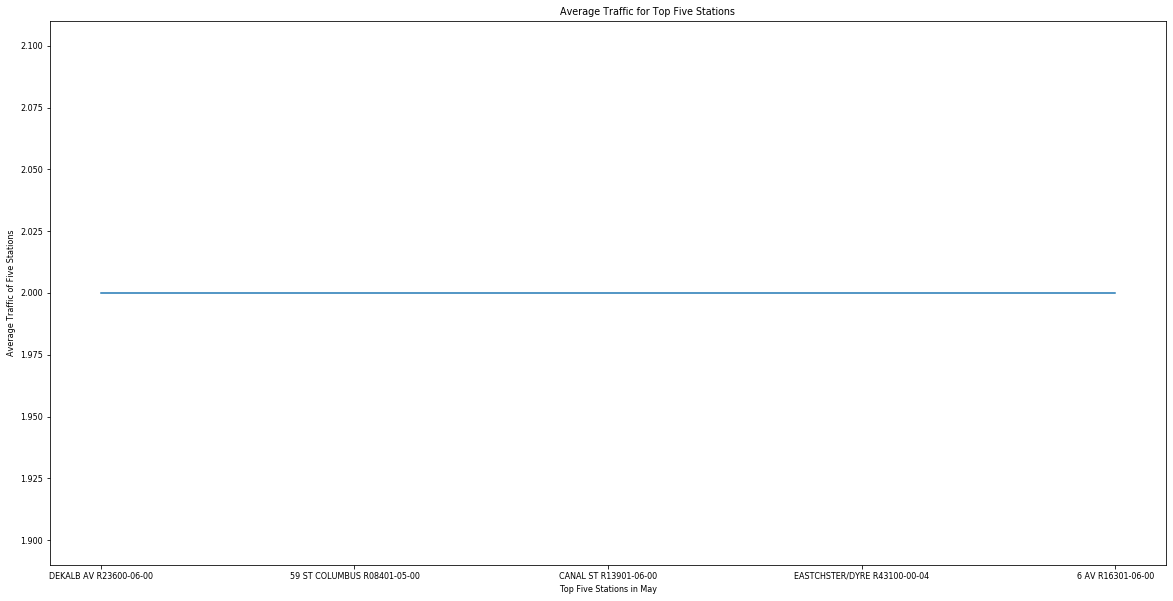

In [185]:
plt.figure(figsize=(20, 10))
#plt.rcParams['figure.figsize']=(16,10)
#plt.yscale("log")
x=Vis3.DUS
y=Vis3.trafTo_mean
plt.plot(x,y)
#plt.title("                           Average Traffic for Top Five Stations ",family='serif',fontsize = 30,loc='left',color='b')
plt.title("                           Average Traffic for Top Five Stations ")
plt.xlabel("Top Five Stations in May")
plt.ylabel("Average Traffic of Five Stations")
plt.rcParams.update({"font.size": 8})
plt.savefig("AvgTraggicAMay.png")

In [186]:
df_concat_3.columns

Index(['DUS', 'entries_sum', 'entries_mean', 'entries_max', 'exits_sum',
       'exits_mean', 'exits_max', 'trafTo_sum', 'trafTo_mean', 'trafTo_max'],
      dtype='object')